In [49]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.spatial import distance



In [50]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return distance.cosine(X1, X2)

# Assign cluster clusters based on closest centroid
def make_clusters(centroid_pointspoints, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroid_points:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroid_points based on each cluster's mean
def calculate_centroid_points(clusters, cluster_array):
    new_centroid_points = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroid_points.append(cluster_mean)
    return new_centroid_points

# Calculate variance within each cluster
def calculate_cohesion(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [51]:
iris_data = datasets.load_iris()
test = pd.read_csv("iris.data", header=None)
test.columns = ['f1','f2','f3','f4','target']
iris_df = test.drop(test.columns[4], axis=1)
X = iris_data.data
y = iris_data.target

In [ ]:
X

In [ ]:
for i in range(0,150):
  print ("Features ",X[i,:]," label =",y[i] )

In [ ]:
PCA1 = PCA(n_components = 3) #4 to 3 dimensions
X_PCA = PCA1.fit_transform(X)

#Bring down the features to fix it
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)


ax.set_title(" PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])


In [55]:
def get_kmeans_pp_centroid_points(X1,k = 5):
    centroid_points = X1.sample()
    print(centroid_points)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #Iterate through centroid points
        for index, row in centroid_points.iterrows():
            print(index)
            #print(row)
            #this is calculating distance of centroid with other data
            d = np.sqrt((X1["F1"] - row["F1"])**2 +(X1["F2"] - row["F2"]) + (X1["F3"] - row["F3"])+ (X1["F4"] - row["F4"])**2)
            #check the max distance among all points
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["F1", "F2", "F3","F4"]]).T
        centroid_points = pd.concat([centroid_points,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroid_points

In [ ]:
from pandas.core.frame import DataFrame
dfPCA= DataFrame(iris_df)
dfPCA.columns = ['F1','F2','F3','F4']
dfPCA.sample()
#getting random points and kmeans plus plus initialization
centroid_points_kpp = get_kmeans_pp_centroid_points(dfPCA, k = 4)
centroid_points_kpp.values


In [17]:
k = 4
cluster_vars = []

#centroid_points = [X_PCA[i+2] for i in range(k)]

clusters = make_clusters(centroid_points_kpp.values, iris_df.values)
initial_clusters = clusters
print(0, round(np.mean(calculate_cohesion(clusters, iris_df))))

for i in range(20):
    centroid_points = calculate_centroid_points(clusters, iris_df.values)
    clusters = make_clusters(centroid_points, iris_df.values)
    cluster_var = np.mean(calculate_cohesion(clusters, 
                                                 iris_df.values))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 127
1 25
2 22
3 22
4 22
5 22
6 22
7 22
8 22
9 22
10 22
11 22
12 22
13 22
14 22
15 22
16 22
17 22
18 22
19 22
20 22


In [ ]:
k = 3
cluster_vars = []

centroid_points = [X_PCA[i+2] for i in range(k)]
print(centroid_points)
clusters = make_clusters(centroid_points, X_PCA)
initial_clusters = clusters
print(0, round(np.mean(calculate_cohesion(clusters, X_PCA))))

for i in range(20):
    centroid_points = calculate_centroid_points(clusters, X_PCA)
    clusters = make_clusters(centroid_points, X_PCA)
    cluster_var = np.mean(calculate_cohesion(clusters, 
                                                 X_PCA))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

In [19]:
print(clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
for i in range(0,150):
  print("True label = ",y[i]," Kmean predicted value = ", clusters[i])

In [112]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y, clusters))

Accuracy: 0.24


In [113]:
v_measure_score(clusters, y)

0.7992743588273855

In [104]:
silhouette_avg = silhouette_score(X_PCA, clusters)

#silhouette_vals = silhouette_samples(iris_df,clusters)
silhouette_avg
#silhouette_vals

0.4113546224411172

           F1        F2        F3
121  1.199001 -0.606092  0.511856
121
121
100
121
100
22


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,F1,F2,F3
121,1.199001,-0.606092,0.511856
100,2.531193,-0.009849,0.760165
22,-3.215939,0.133468,0.292397
13,-3.223804,-0.511395,0.061300


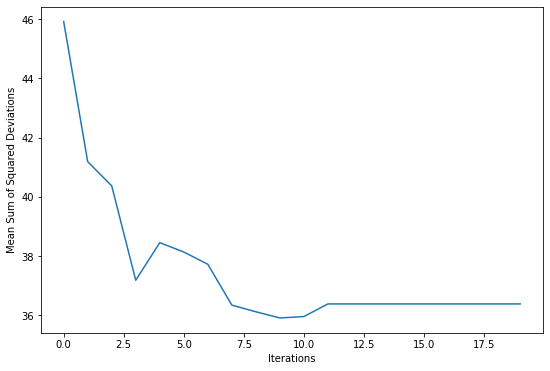

In [21]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd', bpi=150)

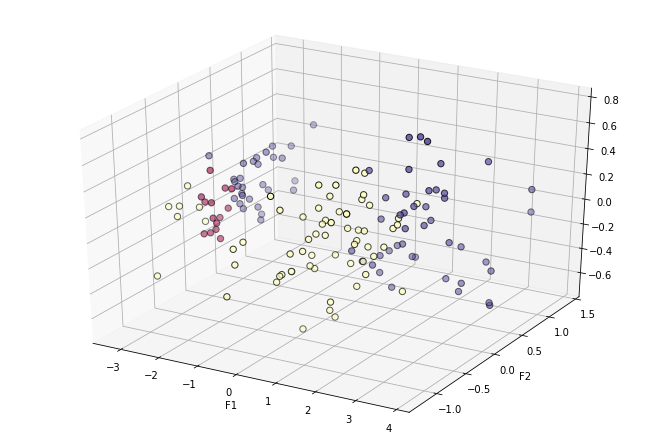

In [26]:
plt.subplots(figsize=(9,6))
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=initial_clusters, cmap=plt.cm.Spectral, edgecolor='k', s=40);
plt.xlabel('F1')
plt.ylabel('F2')

plt.savefig('initial_clusters', bpi=150)

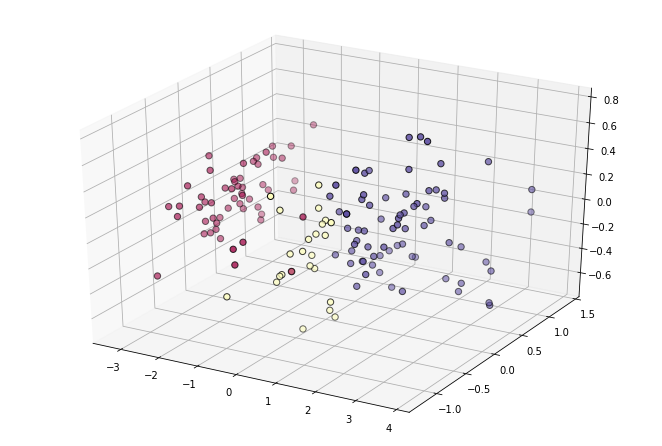

In [27]:
plt.subplots(figsize=(9,6))
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1],
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('final_clusters', bpi=150)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=clusters, cmap=plt.cm.Spectral, edgecolor='k', s=40);


MNIST implementing

In [59]:
Test = pd.read_csv("MNIST.txt", header=None, skip_blank_lines=False, delim_whitespace=True)
Test = Test.to_numpy()
Test_lines = np.asarray([Test[i][0].split(",") for i in range(Test.shape[0])])

In [60]:
print(Test_lines.shape)


(10740, 784)


In [ ]:
digits = Test_lines.reshape(Test_lines.shape[0],28,28)
fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(np.uint8(digits[i]), cmap='gray', vmin=0, vmax=255)
    

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(200)
train = pca.fit_transform(Test_lines.astype(float)/255)
print(train[0][0:5])

In [68]:
# Normalization
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(train)  
train = transformer.transform(train)
print(train[0][0:5])

[ 0.1672163  -0.03241218  0.25836861  0.34740969 -0.24540056]


In [69]:
#T-SNE
from sklearn import manifold
                     
tsne = manifold.TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(train)
Test_lines = X_tsne
print(X_tsne[0:3])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ 52.260754  17.845919]
 [-20.55797   57.215214]
 [-31.951233  71.70132 ]]


In [70]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

<Figure size 432x288 with 0 Axes>

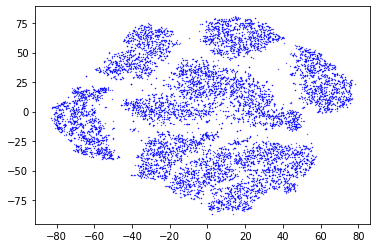

In [71]:
fig = plt.figure()

cmap = get_cmap(10)
fig, ax = plt.subplots()
for i in range(1):
        ax.scatter(X_tsne[:, 0], X_tsne[:, 1], s=0.09, c='b')

In [72]:
def get_kmeans_pp_centroid_points_mnist(X1,k = 10):
    centroid_points = X1.sample()
    print(centroid_points)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroid_points
        for index, row in centroid_points.iterrows():
            print(index)
            #print(row)
            #this is calculating distance of centroid with other data 
            d = np.sqrt((X1["F1"] - row["F1"])**2 +(X1["F2"] - row["F2"])**2)
            #check max distance among all points.
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["F1", "F2"]]).T
        centroid_points = pd.concat([centroid_points,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroid_points

In [ ]:
from pandas.core.frame import DataFrame
dfPCA= DataFrame(Test_lines)
dfPCA.columns = ['F1','F2']
dfPCA.sample()
centroid_points_kpp = get_kmeans_pp_centroid_points_mnist(dfPCA, k = 8)
centroid_points_kpp.values

In [ ]:
k = 2
cluster_vars = []

centroid_points = [Test_lines[i+2] for i in range(k)]

clusters = make_clusters(centroid_points_kpp.values, Test_lines)
initial_clusters = clusters
print(0, round(np.mean(calculate_cohesion(clusters, Test_lines))))

for i in range(20):
    centroid_points = calculate_centroid_points(clusters, Test_lines)
    clusters = make_clusters(centroid_points_kpp.values, Test_lines)
    cluster_var = np.mean(calculate_cohesion(clusters, 
                                                 Test_lines))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

In [ ]:
clusters

In [162]:
np.savetxt("format" + ".txt", clusters, fmt='%s')

In [90]:
silhouette_avg = silhouette_score(Test_lines, clusters, metric ='cosine')

#silhouette_vals = silhouette_samples(iris_df,clusters)
silhouette_avg
#silhouette_vals

0.5960057

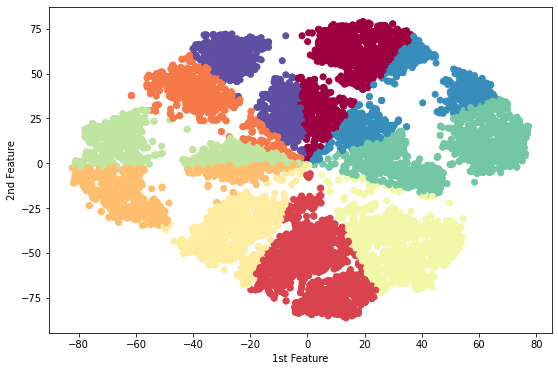

In [47]:
plt.subplots(figsize=(9,6))
plt.scatter(x=Test_lines[:,0], y=Test_lines[:,1],
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature');
plt.savefig('final_clusters', bpi=150)